### Project 2
### Stephanie Schefer
---

  1.  Write code for creating 200 simple random samples of size 30 from a population of size 1000000 that follows a beta distribution with loc=3, scale =4, 𝛼=1.5  and  𝛽=2.3 . If you consider a 96% confidence level, create the corresponding 200 confidence intervals and check with code how many trap inside the mean of the population. Hint: you can approximate the mean and the standard deviation of the population.

mean = alpha/(alpha+beta)

variance = (alpha*beta)/[(alpha+beta)^2(alpha+beta+1)]

In [1]:
# import distribution
from scipy.stats import beta,t
import numpy as np

# set the number of samples, the size of each sample to be used for sampling from the population distribution
num_samples = 200
sample_size = 30

# population distribution parameters
l = 3 #loc
sc = 4 #scale
al = 1.5 #alpha
be = 2.3 #beta
si = 1000000 #size of pop

# create the population distribution
pop_dist = beta.rvs(loc=l, scale=sc, a= al, b=be, size=si)

# calc mean of the populaiton distribution
mu = np.mean(pop_dist)

# Create many simple random samples and keep track of their means in an array
samples = [] #initialize a list to keep track of sample mean,sample stdeviation
conf_int = [] #create empty list to put confidence intervals

success=0 # initialize a success counter for when the populaiton mean mu is within the 96% CI

t_alpha = t.ppf(q=0.98,df=sample_size-1) #two tailed test, so split 4% in two on either tail #96% CI  # q=96% in the center +4%/2 = 98%, with 2% remaining on the right

for i in range(num_samples):
  current_sample = np.random.choice(pop_dist,size=sample_size, replace=False) #select a random sample from the populaiton distribution
 
  mean_sample = np.mean(current_sample) # find the mean and st dev of the sample to have stored for later
  stdev_sample = np.std(current_sample) 
  samples.append([mean_sample,stdev_sample]) # store the sample mean and stdev in a list
  
  adjustment = t_alpha*(stdev_sample/np.sqrt(sample_size))# t_alpha/2*(s/sqrt(n))

  # calculate the intervals
  ci_lower_bound = mean_sample-adjustment
  ci_upper_bound = mean_sample + adjustment

  conf_int.append([ci_lower_bound,ci_upper_bound]) # store the intervals in a list to reference later if needed
 
  if (ci_lower_bound<=mu) and (mu<=ci_upper_bound): # is the mean of the populaiton is within the 96% CI for the true value of the population mean based on the sample selected
    success+=1 # success is how many tiems the pop mean was in the CI

print(success/num_samples) # print percentage

0.95


2. Create a mini-casino with 5 slot machines whose such that the rewards are distributed as follows:
Machine_1: Normal distribution with mean 0.2 and standard deviation 1.1
Machine_2: Uniform distribution supported between 1 and 2.5.
Machine_3 Triangular distribution supported between 0.5 and 2, and the vertex projection splits the base 70%-30%.
Machine_4 Gamma distribution supported between -0.25 and infinity, with 𝛽 = 2/3, and 𝛼=2
Machine_5 Beta distribution supported between 0 and 2.5, with 𝛼=2.5, and 𝛽 = 2.3
Assume it costs $2 to play each machine once. Write code and apply the reinforcement learning method studied to determine the two most lucky machines.

In [2]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [3]:
from scipy.stats import beta,norm,uniform, triang, gamma
import numpy as np

In [4]:
def Casino(machine): # here we make a Casino with many slot machines
   
    if(machine == 1):
        return round(norm.rvs(loc=0.2,scale=1.1),2) #loc is mean, scale is stdev
    
    if(machine == 2):
        return round(uniform.rvs(loc=1,scale=2.5-1),2) #loc is lower bound, scale is how much you go over to the right
    
    if(machine==3):
        return round(triang.rvs(loc=0.5,scale=2-0.5,c=0.7),2) # loc is lower bound, scale is how much you go over to the right, c is % split location of the perpendicular line
    
    if(machine ==4):
        return round(gamma.rvs(a=2,loc=-.25,scale=3/2),2) #scale = 1/beta

    if (machine ==5):
        return round(beta.rvs(a=2.5,b=2.3,loc=0,scale=2.5),2)

    if(machine >5):
        print("There are only 5 slot machines!")

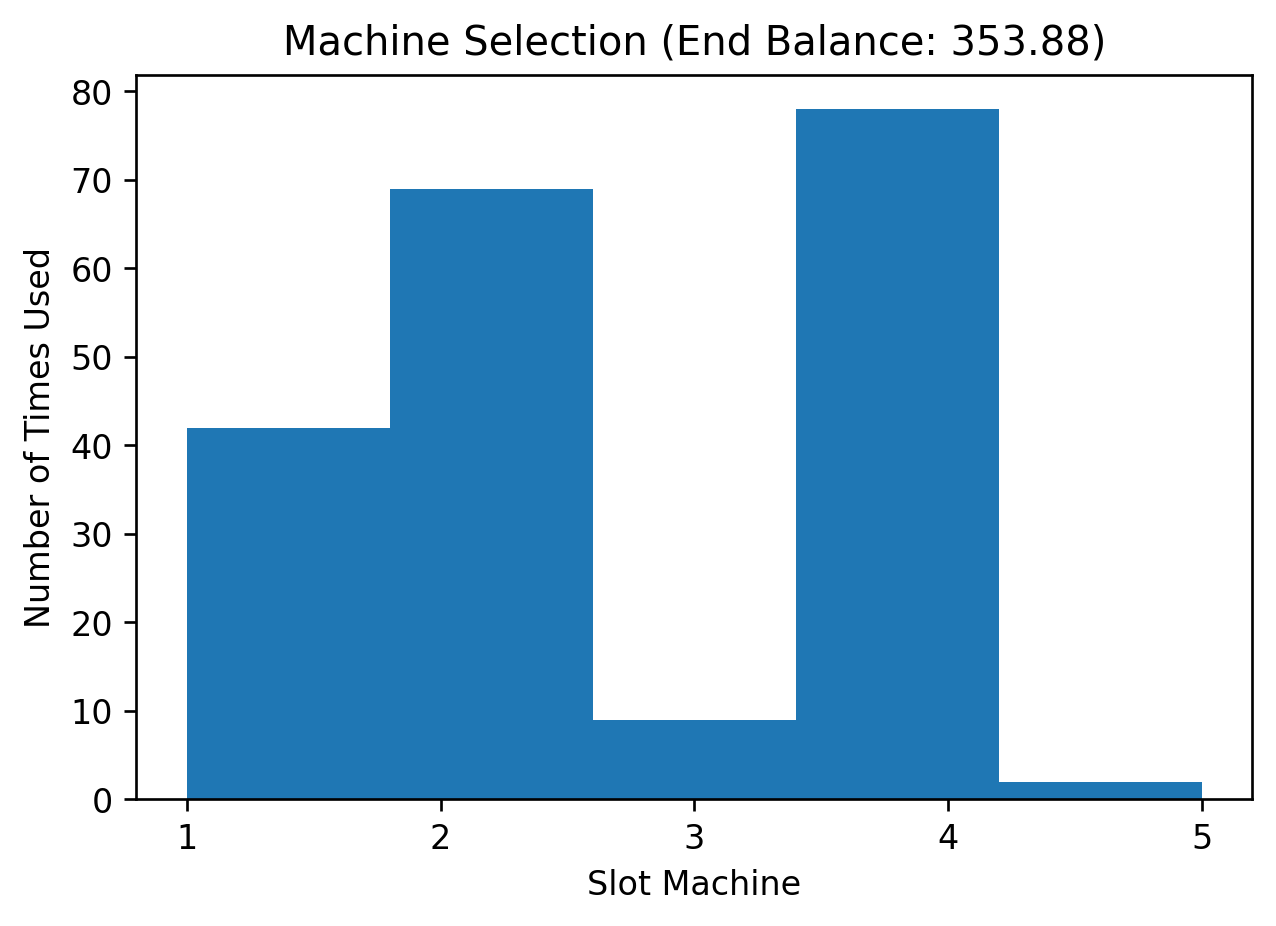

In [5]:
# this is the actual UCB algorithm
N = 200
d = 5
machine_record = []
award_record = []
balance = 400 # changed balance to be 400 because we are playing 200 times and each time it costs 2 dollars (if you lose the slot, you just don't get any money, if you win, end balance will be positive)

c = 0.9 # we can provide a "guess" for the constant c
number_of_selections = [0] * d
sum_of_rewards = [0] * d

n=0
#for n in range(N): # here we start playing
while n<N:
  machine_choice = 1
  max_upper_bound = 0
  for i in range(d):
    if (number_of_selections[i] > 0):
      average_reward = sum_of_rewards[i]/number_of_selections[i]
      E = c*np.sqrt(np.log(n)/number_of_selections[i])
      upper_bound = average_reward + E
    else:
      upper_bound = 1e200
    

    if(upper_bound >= max_upper_bound):
      max_upper_bound = upper_bound
      machine_choice = i+1 # here i+1 is because of the way Python indexes arrays
             
    machine_record.append(machine_choice) # here we keep track of the machines played
    number_of_selections[machine_choice-1] = number_of_selections[machine_choice-1] + 1 # we also keep track of how many times we played each machine
    award = Casino(machine=machine_choice) # the oputput of the machine played
    sum_of_rewards[machine_choice-1] = sum_of_rewards[machine_choice-1] + award # we keep track of the rewards from each machine
    balance = balance - 2 + award # here we keep track of the balance in the wallet
    n+=1

plt.hist(machine_record, bins=5)
plt.title("Machine Selection (End Balance: " + str(round(balance,2)) + ")")
plt.xlabel("Slot Machine")
plt.xticks(np.arange(1,6,1)) # range 1-5 because of having 5 machines
plt.ylabel("Number of Times Used")
plt.show()

The two lucky machines are 2 and 4.

3. Consider the data Groceries.csv. Apply the "apriori" alorithm to determine what are the rules betweeen two items that have a minimum support of 0.005, a minimum confidence of 0.01, and a lift of at least 3.0.

Suggestion: preprocess the data to track the name of different items transacted each day.

In [6]:
!pip install -q apyori #installing for data mining

In [7]:
!pip install -q pandas pyfim==6.28 #installing for data mining

     |████████████████████████████████| 357 kB 8.6 MB/s 


In [8]:
import pandas as pd
import numpy as np
from apyori import apriori 
from fim import eclat

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
groceries = pd.read_csv('drive/MyDrive/School/Applied_Machine_Learning/Assignments/Project_2/Groceries_Data.csv')
groceries

# a member can make a purchase on more than one day
# there are multiple customers per day
# because of these two reasons, member num and date together make the unique identifier if we are finding association rules by each individual purchase
# in this case, however, we are finding rules based on the date so we do not need to do this

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [14]:
# how many times were each item transacted.
# This is not needed, but I was curious to know
counts = groceries['itemDescription'].value_counts()
counts


whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
                    ... 
frozen chicken         5
toilet cleaner         5
bags                   4
baby cosmetics         3
kitchen utensil        1
Name: itemDescription, Length: 166, dtype: int64

In [17]:
# here we pivot the data frame to see the products transacted on each date

pd.options.mode.chained_assignment = None
groceries['cols'] = groceries.groupby('Date').cumcount()
groceries_pivot = groceries.pivot(index = 'Date',columns = 'cols')[['itemDescription']]

In [18]:
groceries_pivot

itemDescription                                       \
cols                      0                 1                  2    
Date                                                                
01-01-2014           cleaner           sausage     tropical fruit   
01-01-2015       canned beer      frozen meals             butter   
01-02-2014  other vegetables         pip fruit        frankfurter   
01-02-2015        whole milk       canned beer      bottled water   
01-03-2014           sausage              meat              sugar   
...                      ...               ...                ...   
31-07-2015           vinegar           chicken    root vegetables   
31-08-2014              pork  other vegetables               beef   
31-08-2015       brown bread       frankfurter            chicken   
31-10-2014            yogurt       frankfurter   other vegetables   
31-10-2015           chicken       canned beer  frozen vegetables   

                                                                \
cols                  3                 4                   5    
Date                                                             
01-01-2014    whole milk      citrus fruit              onions   
01-01-2015           ham      citrus fruit      tropical fruit   
01-02-2014         sugar  other vegetables   frozen vegetables   
01-02-2015          soda        whole milk    other vegetables   
01-03-2014       sausage      bottled beer          whole milk   
...                  ...               ...                 ...   
31-07-2015       chicken           sausage  whipped/sour cream   
31-08-2014    whole milk  hygiene articles          whole milk   
31-08-2015  citrus fruit           berries          whole milk   
31-10-2014   salty snack     sweet spreads              pastry   
31-10-2015          beef       canned beer             chicken   

                                                                       \
cols                      6                 7                      8    
Date                                                                    
01-01-2014  other vegetables           berries         hamburger meat   
01-01-2015           dessert        whole milk         tropical fruit   
01-02-2014              beef           waffles                   beef   
01-02-2015        whole milk       canned beer              pip fruit   
01-03-2014  other vegetables   root vegetables  fruit/vegetable juice   
...                      ...               ...                    ...   
31-07-2015           sausage  other vegetables            canned beer   
31-08-2014    hamburger meat   root vegetables       other vegetables   
31-08-2015        rolls/buns        whole milk                    ham   
31-10-2014     specialty bar   root vegetables             white wine   
31-10-2015    tropical fruit     bottled water           frozen meals   

                              ...                                          \
cols                      9   ...   86   87   88   89   90   91   92   93   
Date                          ...                                           
01-01-2014    hamburger meat  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
01-01-2015       frankfurter  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
01-02-2014              meat  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
01-02-2015    tropical fruit  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
01-03-2014              soda  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
31-07-2015            dishes  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
31-08-2014  other vegetables  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
31-08-2015      citrus fruit  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
31-10-2014   root vegetables  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
31-10-2015    tropical fruit  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                   

In [19]:
# now we can get the list of the purchased items for each transaction

purchases = [] # list of products transacted
for i in range(0,len(groceries_pivot)):
    purchases.append([str(groceries_pivot.values[i,j]) for j in range(0,96)])

In [20]:
purchases[3]

['whole milk',
 'canned beer',
 'bottled water',
 'soda',
 'whole milk',
 'other vegetables',
 'whole milk',
 'canned beer',
 'pip fruit',
 'tropical fruit',
 'domestic eggs',
 'other vegetables',
 'frozen meals',
 'pork',
 'canned beer',
 'sausage',
 'whole milk',
 'ham',
 'pork',
 'canned beer',
 'soda',
 'root vegetables',
 'sausage',
 'beef',
 'yogurt',
 'yogurt',
 'whole milk',
 'brown bread',
 'other vegetables',
 'whole milk',
 'yogurt',
 'yogurt',
 'other vegetables',
 'sliced cheese',
 'liver loaf',
 'other vegetables',
 'tropical fruit',
 'long life bakery product',
 'whole milk',
 'frozen vegetables',
 'beef',
 'yogurt',
 'pork',
 'waffles',
 'tropical fruit',
 'other vegetables',
 'whole milk',
 'pip fruit',
 'UHT-milk',
 'whole milk',
 'yogurt',
 'cream cheese ',
 'processed cheese',
 'canned fish',
 'oil',
 'flower (seeds)',
 'white bread',
 'newspapers',
 'oil',
 'sugar',
 'artif. sweetener',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',

In [22]:
# we create rules for the APRIORI algorithm
rules = apriori(purchases, min_support = 0.005, min_confidence = 0.01, min_lift=3, max_length=2) # adding max_length 2 argument becuase we want associations by two items


In [23]:
results = list(rules)

In [24]:
results

[RelationRecord(items=frozenset({'cleaner', 'abrasive cleaner'}), support=0.005494505494505495, ordered_statistics=[OrderedStatistic(items_base=frozenset({'abrasive cleaner'}), items_add=frozenset({'cleaner'}), confidence=0.18181818181818182, lift=4.564263322884013), OrderedStatistic(items_base=frozenset({'cleaner'}), items_add=frozenset({'abrasive cleaner'}), confidence=0.13793103448275865, lift=4.564263322884013)]),
 RelationRecord(items=frozenset({'baking powder', 'decalcifier'}), support=0.008241758241758242, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'decalcifier'}), confidence=0.05454545454545455, lift=4.412121212121213), OrderedStatistic(items_base=frozenset({'decalcifier'}), items_add=frozenset({'baking powder'}), confidence=0.6666666666666667, lift=4.412121212121213)]),
 RelationRecord(items=frozenset({'canned fruit', 'sauces'}), support=0.005494505494505495, ordered_statistics=[OrderedStatistic(items_base=frozenset({'can

In [25]:
rules = 0
for i in range(0,len(results)): 
    result = results[i]
    supp   = int(result.support*10000)/100
    conf   = int(result.ordered_statistics[0].confidence*100)
    hypo   = ''.join([x+' ' for x in result.ordered_statistics[0].items_base])
    conc   = ''.join([x+' ' for x in result.ordered_statistics[0].items_add if x!='nan'])
    if "nan" not in hypo:
        rules = rules + 1
        print("If "+str(hypo)+" is purchased, " +str(conf)+" % of the time " + str(conc)+" is purchased [support - " +str(supp)+"%]")
print("Total rules built : " +str(rules))

If abrasive cleaner  is purchased, 18 % of the time cleaner  is purchased [support - 0.54%]
If baking powder  is purchased, 5 % of the time decalcifier  is purchased [support - 0.82%]
If canned fruit  is purchased, 19 % of the time sauces  is purchased [support - 0.54%]
If cereals  is purchased, 9 % of the time cookware  is purchased [support - 0.54%]
If cleaner  is purchased, 13 % of the time rum  is purchased [support - 0.54%]
If cocoa drinks  is purchased, 31 % of the time finished products  is purchased [support - 0.68%]
If curd cheese  is purchased, 11 % of the time light bulbs  is purchased [support - 0.68%]
If decalcifier  is purchased, 44 % of the time pet care  is purchased [support - 0.54%]
If female sanitary products  is purchased, 10 % of the time honey  is purchased [support - 0.54%]
If female sanitary products  is purchased, 12 % of the time prosecco  is purchased [support - 0.68%]
If female sanitary products  is purchased, 17 % of the time softener  is purchased [support

In [26]:
for item in results:
    pair = item[0]
    # We cannot seem to tell apriori to ignore NaN items, so we will refrain from printing results containing them
    # they will be returned as lower-case text "nan".
    if "nan" not in pair:
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1]) # arrow means implies the purchase of

        #second index of the inner list
        print("Support: " + str(round(item[1]*100,2)) + "%")

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(round( item[2][0][2]*100,2)) + "%")
        print("Lift: " + str( round(item[2][0][3],2) ))

Rule: cleaner -> abrasive cleaner
Support: 0.55%
Confidence: 18.18%
Lift: 4.56
Rule: baking powder -> decalcifier
Support: 0.82%
Confidence: 5.45%
Lift: 4.41
Rule: canned fruit -> sauces
Support: 0.55%
Confidence: 19.05%
Lift: 3.22
Rule: cereals -> cookware
Support: 0.55%
Confidence: 9.52%
Lift: 4.08
Rule: cleaner -> rum
Support: 0.55%
Confidence: 13.79%
Lift: 3.35
Rule: cocoa drinks -> finished products
Support: 0.69%
Confidence: 31.25%
Lift: 3.99
Rule: light bulbs -> curd cheese
Support: 0.69%
Confidence: 11.63%
Lift: 3.02
Rule: pet care -> decalcifier
Support: 0.55%
Confidence: 44.44%
Lift: 3.99
Rule: honey -> female sanitary products
Support: 0.55%
Confidence: 10.0%
Lift: 5.6
Rule: female sanitary products -> prosecco
Support: 0.69%
Confidence: 12.5%
Lift: 4.79
Rule: female sanitary products -> softener
Support: 0.96%
Confidence: 17.5%
Lift: 3.11
Rule: specialty fat -> female sanitary products
Support: 0.69%
Confidence: 12.5%
Lift: 3.14
Rule: honey -> flower (seeds)
Support: 0.55%
